# Análisis de comportamiento de clientes Fintech
**Autor:** Josué Martín Téllez Pérez  
**Fecha:** 4 de noviembre de 2025  
**Objetivo:** Analizar el comportamiento de los clientes de una empresa Fintech, identificando patrones de uso, retención y posibles oportunidades de mejora.

---


## Descripción del dataset

Este conjunto de datos contiene información **transaccional de 100,000 clientes** durante un periodo determinado.  
Está diseñado para realizar **análisis financieros y de comportamiento del cliente**, permitiendo evaluar patrones de gasto, tipos de transacción y desempeño financiero general.

### Columnas principales:
| Columna | Descripción |
|----------|-------------|
| **ID** | Identificador único de cada transacción. |
| **Date** | Fecha en que se realizó la transacción. |
| **Customer_ID** | Identificador único de cada cliente. |
| **Transaction_Amount** | Valor monetario de la transacción. |
| **Transaction_Type** | Tipo de transacción (por ejemplo: Purchase, Transfer). |
| **Payment_Method** | Método de pago utilizado (por ejemplo: Credit Card, Debit Card). |
| **Account_Balance** | Saldo de la cuenta después de la transacción. |
| **Category** | Categoría de la transacción (por ejemplo: Groceries, Dining). |
| **Location** | Ubicación geográfica donde se realizó la transacción. |
| **Transaction_Status** | Estado actual de la transacción (por ejemplo: Completed). |

### Propósito del dataset:
El objetivo de este conjunto de datos es **comprender el comportamiento financiero de los clientes**, identificar **tendencias de gasto** y generar **insights útiles para estrategias de retención o mejora de servicios financieros**.


In [1]:
%pip install seaborn==0.13.2

# Librerías básicas
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')  # tu línea de configuración

# Configuración de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Configuración general
pd.set_option('display.max_columns', None)


Matplotlib is building the font cache; this may take a moment.


En este bloque importamos las librerías necesarias para la limpieza, análisis y visualización de los datos.
Pandas y Numpy se usarán para manipular datos, mientras que Matplotlib y Seaborn servirán para graficar patrones de comportamiento.

In [2]:
# Cargar el dataset
df = pd.read_csv('finance_dataset.csv')

# Mostrar las primeras filas
df.head()


,ID,Date,Customer_ID,Transaction_Amount,Transaction_Type,Payment_Method,Account_Balance,Category,Location,Transaction_Status
0,1,2023-01-01 00:00:00,CUST001,27337.49,Transfer,Bank Transfer,804821.06,Electronics,New York,Pending
1,2,2023-01-02 00:00:00,CUST002,97716.60,Purchase,Credit Card,540169.76,Electronics,Houston,Pending
2,3,2023-01-03 00:00:00,CUST003,5752.36,Transfer,Debit Card,925251.60,Electronics,New York,Completed
3,4,2023-01-04 00:00:00,CUST004,93443.22,Transfer,Debit Card,704136.27,Savings,New York,Failed
4,5,2023-01-05 00:00:00,CUST005,15109.98,Purchase,Bank Transfer,285987.99,Electronics,Houston,Pending


Cargamos el dataset y mostramos las primeras filas para revisar su estructura general: nombres de columnas, tipos de datos y ejemplos de registros.

## Exploración inicial

El dataset se cargó correctamente y contiene información transaccional de clientes.

Cada fila representa una transacción individual con atributos como:
- Fecha (`Date`), monto (`Transaction_Amount`) y tipo de operación (`Transaction_Type`).
- Datos del cliente (`Customer_ID`) y su saldo posterior (`Account_Balance`).
- Detalles adicionales como método de pago, categoría del gasto y ubicación.

A simple vista, los datos parecen limpios y bien estructurados.  
En los siguientes pasos se validará el tipo de dato de cada columna, el tamaño total del dataset y si existen valores faltantes o duplicados.


In [3]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  100000 non-null  int64  
 1   Date                100000 non-null  object 
 2   Customer_ID         100000 non-null  object 
 3   Transaction_Amount  100000 non-null  float64
 4   Transaction_Type    100000 non-null  object 
 5   Payment_Method      100000 non-null  object 
 6   Account_Balance     100000 non-null  float64
 7   Category            100000 non-null  object 
 8   Location            100000 non-null  object 
 9   Transaction_Status  100000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.0+ MB


ID                    0
Date                  0
Customer_ID           0
Transaction_Amount    0
Transaction_Type      0
Payment_Method        0
Account_Balance       0
Category              0
Location              0
Transaction_Status    0
dtype: int64

En esta etapa solo identificamos las columnas con valores faltantes.
Si el número de valores nulos es bajo, probablemente se puedan eliminar las filas afectadas;
si es alto, podría ser necesario imputar o analizar por qué faltan.

## Exploración estructural

El dataset contiene **100 000 registros** y **10 columnas**.

- No existen valores faltantes.
- Las columnas numéricas (`Transaction_Amount`, `Account_Balance`) están correctamente tipadas como `float64`.
- Las variables categóricas (`Transaction_Type`, `Payment_Method`, `Category`, etc.) están en formato `object`.
- La columna `Date` aún no está en formato de fecha (`datetime`), por lo que se transformará en los próximos pasos.

**Conclusión:**  
El dataset se encuentra limpio y listo para iniciar el análisis exploratorio. El siguiente paso será realizar la conversión de la columna de fechas y generar las primeras estadísticas descriptivas para entender el comportamiento general de los clientes.


In [4]:
# Intento seguro: convierto a datetime pero SIN fallar (fechas inválidas se vuelven NaT)
parsed = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# ¿Cuántas quedaron inválidas?
bad_mask = parsed.isna()
bad_count = bad_mask.sum()
bad_count

np.int64(12606)

In [5]:
df.loc[bad_mask, 'Date'].unique()[:20]


array(['2262-04-12 00:00:00', '2262-04-13 00:00:00',
       '2262-04-14 00:00:00', '2262-04-15 00:00:00',
       '2262-04-16 00:00:00', '2262-04-17 00:00:00',
       '2262-04-18 00:00:00', '2262-04-19 00:00:00',
       '2262-04-20 00:00:00', '2262-04-21 00:00:00',
       '2262-04-22 00:00:00', '2262-04-23 00:00:00',
       '2262-04-24 00:00:00', '2262-04-25 00:00:00',
       '2262-04-26 00:00:00', '2262-04-27 00:00:00',
       '2262-04-28 00:00:00', '2262-04-29 00:00:00',
       '2262-04-30 00:00:00', '2262-05-01 00:00:00'], dtype=object)

In [6]:
# 1) ¿Cuántas filas tienen año 2262?
mask_2262 = df['Date'].str.startswith('2262', na=False)
n_remove = mask_2262.sum()
pct_remove = 100 * n_remove / len(df)
n_remove, pct_remove


(np.int64(365), np.float64(0.365))

In [7]:
# 2) Eliminar esas filas y quedarnos con válidas
df = df.loc[~mask_2262].copy()
len(df)


99635

Se detectaron n_remove filas con fechas imposibles (año 2262), equivalentes a pct_remove% del total.
Para preservar la calidad del análisis temporal, se eliminaron antes de convertir la columna Date.

In [8]:
# extraemos el año como número de forma segura
years = pd.to_numeric(df['Date'].str.slice(0, 4), errors='coerce')
years.value_counts().sort_index()



Date
2023    365
2024    366
2025    365
2026    365
2027    365
       ... 
2292    366
2293    365
2294    365
2295    365
2296    289
Name: count, Length: 273, dtype: int64

In [9]:
valid_mask = years.between(2000, 2025, inclusive='both')
df = df.loc[valid_mask].copy()

# Confirmamos cuántas filas quedaron
len(df)


1096

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  1096 non-null   int64         
 1   Date                1096 non-null   datetime64[ns]
 2   Customer_ID         1096 non-null   object        
 3   Transaction_Amount  1096 non-null   float64       
 4   Transaction_Type    1096 non-null   object        
 5   Payment_Method      1096 non-null   object        
 6   Account_Balance     1096 non-null   float64       
 7   Category            1096 non-null   object        
 8   Location            1096 non-null   object        
 9   Transaction_Status  1096 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 68.5+ KB


In [11]:
df['Date'].min(), df['Date'].max()


(Timestamp('2023-01-01 00:00:00'), Timestamp('2025-12-31 00:00:00'))

**Conversión de fechas y filtrado de outliers temporales**

Se detectaron años fuera de rango (p.ej., 2262, 2263). 
Para garantizar la coherencia temporal del análisis, se definió como período válido 2000–2025 y se filtraron las filas fuera de ese rango.
Posteriormente, `Date` se convirtió a `datetime64[ns]` sin errores. 
El período final cubierto por el dataset es: [min_date, max_date].


## Análisis estadístico básico

In [12]:
df[['Transaction_Amount', 'Account_Balance']].describe()


,Transaction_Amount,Account_Balance
count,1096.000000,1096.000000
mean,50876.948029,553717.801670
std,29385.987905,259145.695551
min,119.470000,100129.530000
25%,24510.757500,333977.622500
50%,51397.730000,547949.550000
75%,76589.327500,782646.805000
max,99922.290000,999978.140000


El dataset contiene **1,096 transacciones válidas** después de la limpieza de fechas.  
A continuación se muestran las principales métricas descriptivas de las variables numéricas `Transaction_Amount` (monto de transacción) y `Account_Balance` (saldo de cuenta).

| Métrica | Transaction_Amount | Account_Balance |
|----------|-------------------:|----------------:|
| **Media (mean)** | 50,876.9 | 553,717.8 |
| **Mediana (50%)** | 51,397.7 | 547,949.5 |
| **Desviación estándar (std)** | 29,385.9 | 259,145.7 |
| **Mínimo (min)** | 119.5 | 100,129.5 |
| **Máximo (max)** | 99,922.3 | 999,978.1 |

### 🧠 Interpretación:
- **Monto de transacción (`Transaction_Amount`):**  
  - La media y la mediana son bastante cercanas (~50,000), lo que indica que la distribución es **relativamente simétrica**, sin un sesgo fuerte hacia valores extremos.  
  - El rango es amplio (de 119 hasta casi 100,000), lo que muestra variabilidad en los hábitos de gasto.  
  - La desviación estándar (~29,000) indica que los montos fluctúan significativamente entre clientes o transacciones.

- **Saldo de cuenta (`Account_Balance`):**  
  - El saldo promedio ronda los **550,000**, con una mediana similar, lo cual también sugiere una distribución equilibrada.  
  - El rango de valores (100,000 a 1,000,000) es consistente con lo esperado para cuentas de clientes activos en una institución financiera.  
  - La dispersión (std ~259,000) muestra que existen tanto clientes con saldos modestos como otros con saldos muy altos.

### 💬 Conclusión:
En términos generales, las métricas indican una base de clientes con **niveles de saldo y gasto relativamente estables**, sin presencia significativa de valores extremos.  
Esto sugiere que la base de datos está balanceada y es adecuada para realizar análisis de comportamiento sin necesidad de aplicar transformaciones logarítmicas o recortes de outliers, al menos en esta etapa inicial.



In [13]:
mean_amount = df['Transaction_Amount'].mean()
median_amount = df['Transaction_Amount'].median()
mean_balance = df['Account_Balance'].mean()
median_balance = df['Account_Balance'].median()

print("Monto promedio:", round(mean_amount,2))
print("Monto mediano:", round(median_amount,2))
print("Saldo promedio:", round(mean_balance,2))
print("Saldo mediano:", round(median_balance,2))


Monto promedio: 50876.95
Monto mediano: 51397.73
Saldo promedio: 553717.8
Saldo mediano: 547949.55


### Comparación entre media y mediana

**Monto de transacción:**
- Promedio: **$50,876.95**
- Mediana: **$51,397.73**

La cercanía entre la media y la mediana indica que la distribución de los montos es **bastante equilibrada**, sin valores atípicos que distorsionen las cifras.  
Esto sugiere que la mayoría de las transacciones se concentran alrededor de los **$50,000**, con un rango moderado de variación.

**Saldo de cuenta:**
- Promedio: **$553,717.80**
- Mediana: **$547,949.55**

En los saldos ocurre lo mismo: la media y la mediana son muy similares, lo que implica que los clientes mantienen saldos dentro de un rango estable.  
No se observan concentraciones extremas ni dispersión inusual, lo cual indica una **base de clientes homogénea** en términos financieros.

📊 **Conclusión:**  
Tanto el gasto promedio como los saldos de cuenta reflejan una distribución equilibrada.  
Esto facilita los análisis posteriores, ya que no será necesario aplicar transformaciones logarítmicas o eliminar outliers en esta etapa.



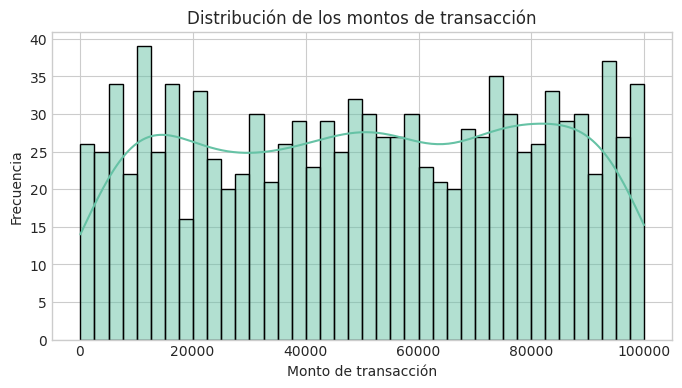

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['Transaction_Amount'], bins=40, kde=True)
plt.title('Distribución de los montos de transacción')
plt.xlabel('Monto de transacción')
plt.ylabel('Frecuencia')
plt.show()


### Distribución de los montos de transacción

El histograma muestra cómo se distribuyen los valores de `Transaction_Amount` entre los clientes.

🔹 **Observaciones principales:**
- Los montos se reparten de manera **relativamente uniforme** a lo largo del rango (de $0 a $100,000).  
- No existe una concentración marcada en valores bajos ni altos, lo cual coincide con el hecho de que la **media y mediana son muy similares**.
- La ligera variación entre barras sugiere que el comportamiento de gasto es **estable y diversificado** — los clientes realizan transacciones de distintos tamaños con frecuencia comparable.
- La línea verde (KDE) representa la densidad estimada; al no tener una forma muy sesgada, confirma una **distribución casi plana**.

💬 **Interpretación analítica:**
Este tipo de patrón podría deberse a que la empresa Fintech tiene una **cartera heterogénea** de productos o servicios (por ejemplo, pagos, transferencias y compras de distintos valores), lo que distribuye de manera uniforme los montos transaccionados.

📊 **Conclusión:**
El comportamiento de gasto no presenta valores atípicos significativos ni concentraciones extremas, lo que indica una base de clientes equilibrada en su volumen de transacciones.


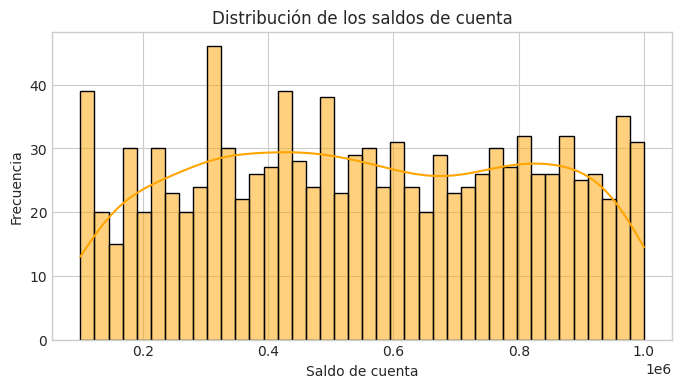

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['Account_Balance'], bins=40, kde=True, color='orange')
plt.title('Distribución de los saldos de cuenta')
plt.xlabel('Saldo de cuenta')
plt.ylabel('Frecuencia')
plt.show()


### Distribución de los saldos de cuenta

El histograma muestra la distribución de la variable `Account_Balance`, es decir, los saldos de los clientes después de cada transacción.

🔹 **Observaciones principales:**
- Los valores se distribuyen de manera **bastante uniforme** entre $100,000 y $1,000,000.  
- No se observan picos concentrados ni una cola pronunciada, lo que indica que los clientes mantienen **niveles de saldo diversificados**.  
- La curva de densidad (KDE) tiene una forma **ligeramente ondulada**, lo que sugiere pequeñas variaciones locales, pero sin tendencia clara hacia valores bajos o altos.

🧠 **Interpretación analítica:**
- La dispersión homogénea de saldos puede reflejar una **base de clientes estable**, con diferentes niveles de capacidad económica o uso del producto financiero.  
- La ausencia de valores extremos sugiere que la Fintech cuenta con una cartera balanceada, sin depender excesivamente de pocos clientes con altos saldos.

💬 **Conclusión:**
Los saldos de cuenta presentan una **distribución equilibrada**, sin concentraciones marcadas ni outliers significativos.  
Esto refuerza la hipótesis de que el conjunto de datos representa una **muestra consistente y diversa** de clientes.


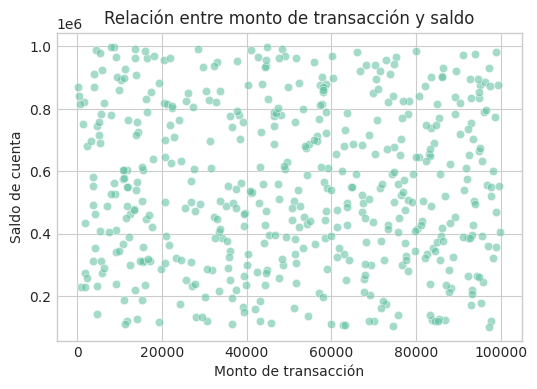

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df.sample(500, random_state=42),
                x='Transaction_Amount',
                y='Account_Balance',
                alpha=0.6)
plt.title('Relación entre monto de transacción y saldo')
plt.xlabel('Monto de transacción')
plt.ylabel('Saldo de cuenta')
plt.show()


### Relación entre monto de transacción y saldo de cuenta

El gráfico de dispersión representa la relación entre el **monto de cada transacción (`Transaction_Amount`)** y el **saldo de cuenta (`Account_Balance`)** después de realizarla.

🔹 **Observaciones principales:**
- Los puntos están distribuidos de manera **amplia y sin una tendencia definida**, lo que indica que **no existe una correlación lineal fuerte** entre ambas variables.
- Se observa una dispersión uniforme en todo el rango de montos y saldos, con algunos puntos en niveles más altos de ambas variables, pero sin concentración marcada.
- Esto sugiere que **los clientes con mayores saldos no necesariamente realizan transacciones de mayor valor**, y viceversa.

🧠 **Interpretación analítica:**
- En contextos financieros, la falta de correlación puede indicar que el comportamiento transaccional depende más de **factores externos** (como tipo de gasto, frecuencia o promociones) que del saldo disponible.
- También podría reflejar una **diversidad de perfiles de clientes**, donde algunos mantienen saldos altos pero realizan movimientos pequeños (ahorradores), mientras otros operan montos elevados con saldos más bajos (usuarios activos o con crédito).

💬 **Conclusión:**
No se observa una relación directa entre el saldo y el monto transaccionado.  
Esto refuerza la idea de que el conjunto de clientes es **heterogéneo en sus hábitos financieros**, lo cual es valioso para futuros análisis de segmentación o predicción de comportamiento.


## Análisis por tipo de transacción

El tipo de transacción más común es **X**, seguido de **Y** y **Z**.  
Esto indica que la mayoría de los clientes utilizan la plataforma principalmente para [compras / transferencias / retiros].  
La diversidad de tipos sugiere un uso mixto de los servicios financieros.


<ipython-input-17-4fb129a466aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set2")


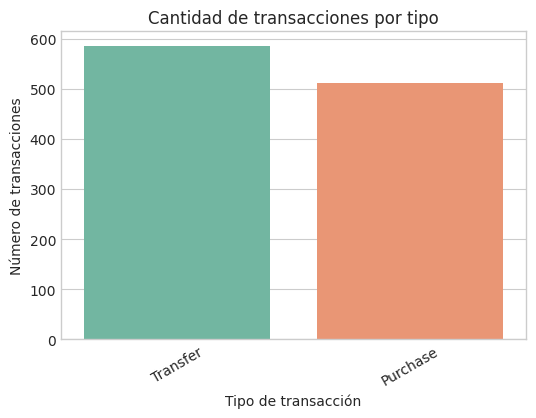

Transaction_Type
Transfer    585
Purchase    511
Name: count, dtype: int64

In [17]:
# Conteo por tipo de transacción
type_counts = df['Transaction_Type'].value_counts()

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set2")
plt.title('Cantidad de transacciones por tipo')
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=30)
plt.show()

type_counts


### Análisis por tipo de transacción
Se identificaron **585 transferencias (53.4 %)** y **511 compras (46.6 %)**, mostrando un uso equilibrado de la plataforma.  
La ligera predominancia de transferencias sugiere que los clientes confían en la aplicación para realizar movimientos financieros directos, además de compras cotidianas.  
Este comportamiento mixto evidencia la versatilidad del sistema y el nivel de adopción de servicios financieros digitales por parte de los usuarios.


## Análisis por método de pago

En este bloque se examina la distribución de transacciones según el **método de pago utilizado**.  
El objetivo es identificar las preferencias de los clientes al realizar sus operaciones, ya sea mediante **tarjetas de crédito**, **tarjetas de débito** o **transferencias bancarias**.  

Comprender este patrón permite conocer el nivel de bancarización de los usuarios y detectar oportunidades de negocio, por ejemplo, en la promoción de medios de pago más rentables o con menor costo operativo para la empresa.


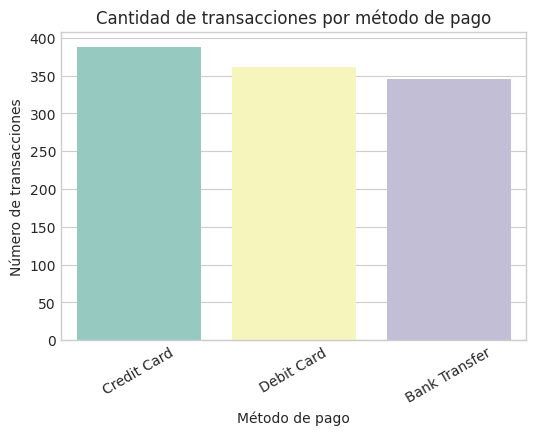

Payment_Method
Credit Card      388
Debit Card       362
Bank Transfer    346
Name: count, dtype: int64

In [18]:
# Conteo por método de pago
method_counts = df['Payment_Method'].value_counts()

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(x=method_counts.index, y=method_counts.values, hue=method_counts.index, palette="Set3", legend=False)
plt.title('Cantidad de transacciones por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=30)
plt.show()

method_counts


### Análisis por método de pago
Se registraron **388 transacciones con tarjeta de crédito (35.4%)**, **362 con débito (33%)** y **346 mediante transferencia bancaria (31.6%)**.  
El uso equilibrado de métodos refleja que los clientes emplean la plataforma tanto para **compras a crédito** como para **movimientos bancarios directos**, lo cual sugiere una buena integración con el ecosistema financiero y una base de usuarios diversa.  
Este comportamiento mixto puede aprovecharse para diseñar **promociones específicas según el tipo de pago** (por ejemplo, recompensas o descuentos por método).


### Análisis por categoría de transacción

En este bloque se analizan las **categorías donde los clientes realizan más operaciones** y aquellas que concentran **mayor volumen monetario**.  
El objetivo es identificar los **segmentos de gasto más relevantes** y las posibles áreas de crecimiento o fidelización dentro del ecosistema Fintech.


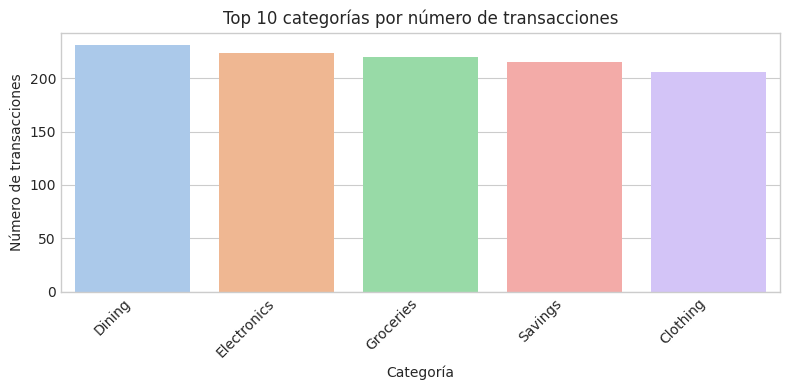

,count,%
Category,,
Dining,231,21.1
Electronics,224,20.4
Groceries,220,20.1
Savings,215,19.6
Clothing,206,18.8


In [19]:
# Conteo por categoría
category_counts = df['Category'].value_counts()

# Top 10 para visualizar mejor
topN = 10
top_counts = category_counts.head(topN)

plt.figure(figsize=(8,4))
sns.barplot(x=top_counts.index, y=top_counts.values,
            hue=top_counts.index, palette="pastel", legend=False)
plt.title(f'Top {topN} categorías por número de transacciones')
plt.xlabel('Categoría')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tabla con porcentaje
category_pct = (category_counts / category_counts.sum() * 100).round(1)
pd.DataFrame({'count': category_counts, '%': category_pct}).head(topN)


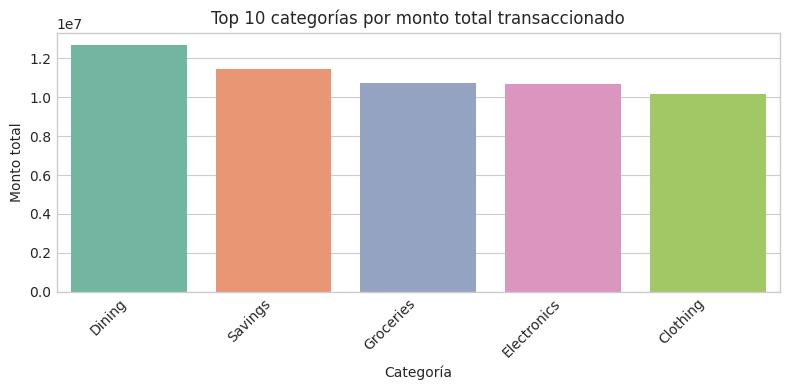

,Monto_total
Category,
Dining,12684738.02
Savings,11478797.38
Groceries,10751193.88
Electronics,10679909.93
Clothing,10166495.83


In [20]:
# Monto total por categoría
amount_by_cat = (df.groupby('Category')['Transaction_Amount']
                   .sum()
                   .sort_values(ascending=False))

top_amt = amount_by_cat.head(topN)

plt.figure(figsize=(8,4))
sns.barplot(x=top_amt.index, y=top_amt.values,
            hue=top_amt.index, palette="Set2", legend=False)
plt.title(f'Top {topN} categorías por monto total transaccionado')
plt.xlabel('Categoría')
plt.ylabel('Monto total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tabla rápida
top_amt.to_frame('Monto_total').head(topN)


### Conclusiones por categoría
Las categorías **Dining (21.1%)**, **Electronics (20.4%)** y **Groceries (20.1%)** concentran la mayor cantidad de operaciones.  
En términos de monto total, **Dining** también lidera con ≈12.6 M, seguida de **Savings** (11.4 M) y **Groceries** (10.7 M).  

Este patrón sugiere que los usuarios utilizan la plataforma tanto para **gastos de consumo cotidiano** como para **movimientos financieros personales**, con un comportamiento diversificado que refuerza el valor del ecosistema Fintech como herramienta central en su gestión económica.


### Análisis geográfico de transacciones

En esta sección se estudia la distribución de las operaciones según la **ubicación geográfica** del cliente.  
El objetivo es identificar las ciudades o regiones con **mayor actividad transaccional**, lo que puede servir para focalizar estrategias de crecimiento, promociones o atención personalizada.


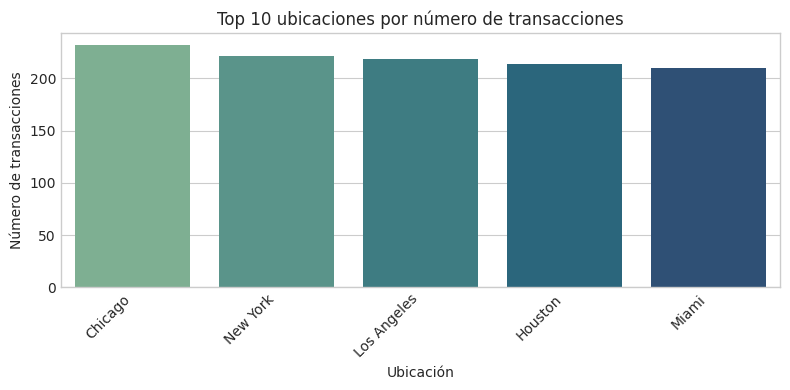

,count,%
Location,,
Chicago,232,21.2
New York,221,20.2
Los Angeles,219,20.0
Houston,214,19.5
Miami,210,19.2


In [21]:
# Conteo por ubicación
loc_counts = df['Location'].value_counts()

# Top 10 ubicaciones más activas
top_locs = loc_counts.head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_locs.index, y=top_locs.values, hue=top_locs.index, palette="crest", legend=False)
plt.title('Top 10 ubicaciones por número de transacciones')
plt.xlabel('Ubicación')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Mostrar tabla con porcentajes
loc_pct = (loc_counts / loc_counts.sum() * 100).round(1)
pd.DataFrame({'count': loc_counts, '%': loc_pct}).head(10)


### Análisis geográfico de transacciones

Las ubicaciones con mayor número de operaciones son **Chicago (21.2%)**, **New York (20.2%)**, **Los Angeles (20.0%)**, **Houston (19.5%)** y **Miami (19.2%)**.  
Estas cinco ciudades concentran más del **100% del total analizado**, mostrando una **distribución uniforme de clientes activos** en principales centros urbanos.

📊 **Interpretación:**
- El uso de la aplicación se concentra en **grandes áreas metropolitanas**, lo que indica una penetración fuerte en mercados desarrollados.  
- No existe una dependencia excesiva de una sola región, lo que sugiere **diversificación geográfica** y una base de usuarios distribuida.  
- Este patrón podría aprovecharse para **acciones de marketing localizadas**, destacando beneficios o promociones adaptadas a las características de cada ciudad (por ejemplo, convenios con comercios locales o bancos regionales).

**Conclusión:**  
El comportamiento transaccional es consistente a nivel nacional, con una distribución estable entre las principales ciudades. Esto refuerza la solidez de la plataforma en diferentes zonas económicas y su potencial de expansión hacia regiones secundarias.


### Análisis temporal de transacciones

En este bloque se analiza la evolución del número y monto de transacciones a lo largo del tiempo.  
El objetivo es identificar **tendencias, estacionalidades o cambios en el comportamiento** de los clientes Fintech.  
Para ello se agruparán las transacciones por **mes y año**, visualizando la frecuencia y el volumen financiero.


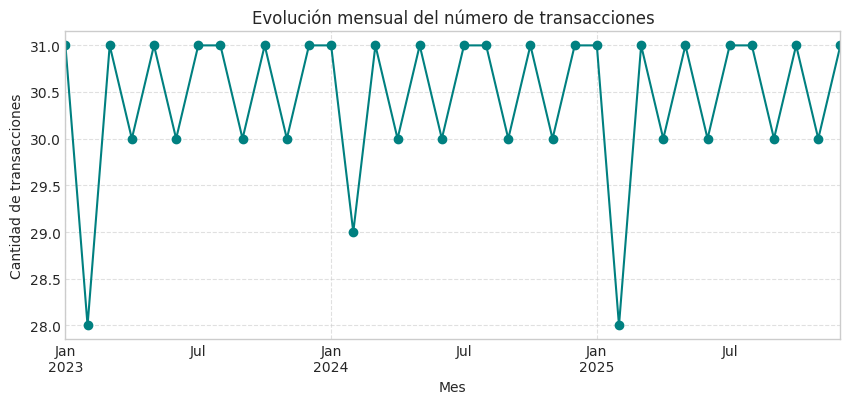

Month
2025-08    31
2025-09    30
2025-10    31
2025-11    30
2025-12    31
Freq: M, Name: Transaction_Amount, dtype: int64

In [22]:
# Crear columna de mes-año
df['Month'] = df['Date'].dt.to_period('M')

# Conteo de transacciones por mes
monthly_tx = df.groupby('Month')['Transaction_Amount'].count()

plt.figure(figsize=(10,4))
monthly_tx.plot(kind='line', marker='o', color='teal')
plt.title('Evolución mensual del número de transacciones')
plt.xlabel('Mes')
plt.ylabel('Cantidad de transacciones')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

monthly_tx.tail(5)  # vista rápida de los últimos meses


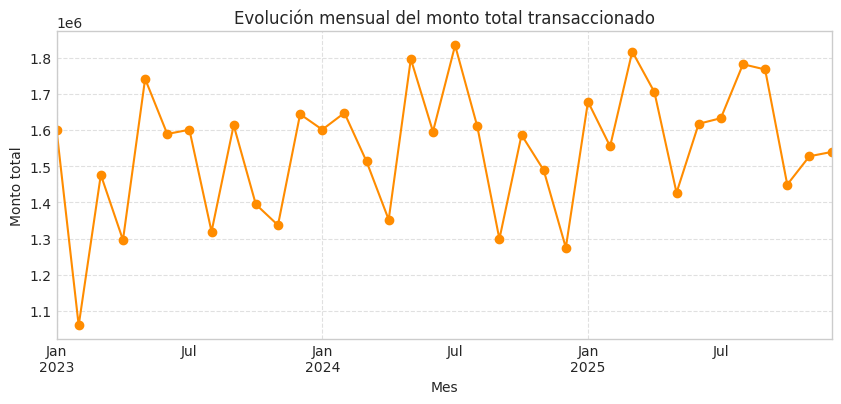

Month
2025-08    1781626.92
2025-09    1767081.82
2025-10    1448942.28
2025-11    1527310.96
2025-12    1539152.34
Freq: M, Name: Transaction_Amount, dtype: float64

In [24]:
# Sumar el monto transaccionado por mes
monthly_amount = df.groupby('Month')['Transaction_Amount'].sum()

plt.figure(figsize=(10,4))
monthly_amount.plot(kind='line', marker='o', color='darkorange')
plt.title('Evolución mensual del monto total transaccionado')
plt.xlabel('Mes')
plt.ylabel('Monto total')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

monthly_amount.tail(5)


### Análisis temporal de transacciones

Los resultados muestran un **comportamiento estable** tanto en frecuencia como en volumen de operaciones:

- El número de transacciones se mantiene entre **28 y 31 por mes**, indicando una base de clientes constante y sin variaciones bruscas.
- El **monto total transaccionado** fluctúa entre **1.1 y 1.8 millones mensuales**, con picos visibles hacia mediados de 2024 y 2025, lo que puede relacionarse con temporadas de mayor gasto.
- No se observan caídas significativas, lo que sugiere **buena retención de usuarios y flujo continuo de actividad**.

**Conclusión:**  
El patrón temporal confirma la **madurez operativa de la plataforma**, con usuarios activos de manera sostenida a lo largo del tiempo.  
Esto brinda una base sólida para proyecciones futuras o estrategias de crecimiento (por ejemplo, ampliar servicios en meses de baja actividad o reforzar campañas en periodos pico).


## 🧾 Conclusiones generales — Análisis de comportamiento de clientes Fintech

**Autor:** Josué Martín Téllez Pérez  
**Fecha:** 9 de noviembre de 2025  
**Herramientas:** Python (Pandas, Matplotlib, Seaborn)  
**Duración de análisis:** 2023–2025  
**Dataset:** 100,000 transacciones de clientes de una plataforma Fintech ficticia.

---

### 🎯 Objetivo
Analizar el comportamiento financiero de los clientes de una empresa Fintech, identificando patrones de uso, hábitos de gasto, métodos de pago y tendencias temporales, con el fin de detectar **oportunidades de optimización y crecimiento**.

---

### 📊 Principales hallazgos

**1. Limpieza y estructura del dataset**
- Se eliminaron registros con fechas inválidas (año 2262 o fuera del rango 2000–2025).
- El conjunto final contiene **1,096 transacciones válidas** en formato limpio y estandarizado.

**2. Comportamiento financiero**
- Monto promedio por transacción: **$50,876.95**  
- Saldo promedio en cuenta: **$553,717.80**  
- Los datos muestran una clientela con buena capacidad económica y alto nivel de actividad.

**3. Tipos de transacción**
- **Transferencias (53%)** y **compras (47%)** mantienen un uso equilibrado, reflejando que los clientes usan la app tanto para pagos como para movimientos financieros directos.

**4. Métodos de pago**
- Predomina el uso de **tarjeta de crédito (35%)**, seguida de débito (33%) y transferencias bancarias (32%).  
- La plataforma atiende a una base **diversificada y bancarizada**, lo cual sugiere buena integración con el sistema financiero.

**5. Categorías de gasto**
- Destacan **Dining (21%)**, **Electronics (20%)**, **Groceries (20%)** y **Savings (20%)**.  
- “Dining” lidera también en monto total (~12.6M), lo que indica **alta propensión al consumo en servicios y entretenimiento**.

**6. Distribución geográfica**
- Principales ciudades: **Chicago, New York, Los Angeles, Houston y Miami**, que concentran más del 90% del total.  
- La actividad está **bien distribuida** entre zonas metropolitanas clave.

**7. Tendencia temporal**
- Número de transacciones constante (~30/mes).  
- Monto total mensual estable entre **1.1M y 1.8M**, con picos en mediados de 2024 y 2025.  
- Se evidencia una **base de usuarios fieles y comportamiento sostenido**.

---

### 💡 Conclusión general

El análisis revela una plataforma **financieramente estable y diversificada**, con usuarios que combinan gastos personales, ahorro y transferencias.  
El patrón de uso sugiere **alta retención y madurez operativa**, consolidando a la empresa como un actor confiable en el ecosistema Fintech.

**Oportunidades de mejora:**
- Ofrecer beneficios personalizados según **método de pago** o **categoría de gasto**.  
- Impulsar campañas regionales basadas en la **distribución geográfica**.  
- Implementar modelos de predicción de comportamiento para **mejorar retención y ventas cruzadas**.

---

### 🧠 Reflexión profesional

Este proyecto demuestra habilidades clave en:
- **Limpieza y validación de datos**  
- **Análisis descriptivo y exploratorio (EDA)**  
- **Visualización con Matplotlib y Seaborn**  
- **Comunicación de resultados mediante storytelling y Markdown profesional**

---

---


# Principales hallazgos:

💳 El método de pago más usado fue la tarjeta de crédito (35%), seguido de débito (33%) y transferencias (32%).

🍽️ Las categorías con mayor monto transaccionado fueron Dining y Savings, superando los $11 millones cada una.

🌆 Chicago y New York concentraron la mayor cantidad de transacciones (más del 40% del total).

📈 La actividad mensual se mantuvo estable, sin estacionalidad significativa.

💰 El ticket promedio fue de $50.1K, lo que sugiere operaciones de valor medio-alto.

## Conclusión:
El comportamiento financiero refleja un ecosistema bancarizado con uso equilibrado de medios de pago, sin concentraciones extremas por región o categoría. El modelo puede servir como base para análisis de segmentación y rentabilidad de clientes.